# Creating Features

In this notebook, we will learn a number of common features transformations, that one can you have identifying (using mutual information) a set of potential features.

In [2]:
# ! kaggle datasets download -d sobhanmoosavi/us-accidents
# ! kaggle datasets download -d pankajjsh06/ibm-watson-marketing-customer-value-data
# ! unzip ibm-watson-marketing-customer-value-data.zip
# ! unzip us-accidents.zip

  0%|                                                | 0.00/345k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 345k/345k [00:00<00:00, 4.20MB/s]


### Tips on Discovering New Features:
1. Understand the features -> go to *data documentation* to explore them;
2. Research the problem domain to acquire **domain knowledge**;
3. Study previous work -> [Solution write-ups](https://www.kaggle.com/code/sudalairajkumar/winning-solutions-of-kaggle-competitions/notebook) from Kaggle competitions are a great resource;
4. Use data visualization -> Visualizations can reveal pathologies in the distribution of a feature or complicated relationships that could be simplified;

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get Data
autos = pd.read_csv(os.path.join('data', 'autos.csv'))
accidents = pd.read_csv(os.path.join('data', 'US_Accidents_Dec21_updated.csv'))
concrete = pd.read_csv(os.path.join('data', 'concrete.csv'))
customer = pd.read_csv(os.path.join('data', 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'))

## Mathematical Transformations

Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your domain research. 
1. Research yields a variety of formulas for creating potentially useful new features;
2. The more complicated a combination is, the more difficult it will be for a model to learn;
3. Data visualization can suggest transformations, often by "reshaping" of a feature through **powers** or **logarithms**; 

#### Examples:
1. The "stroke ratio" is a measure of how efficient an engine is versus how performant:

In [2]:
autos['strokeratio'] = autos.stroke / autos.bore
autos[['strokeratio', 'stroke', 'bore']].tail(3)

,strokeratio,stroke,bore
190,0.801676,2.87,3.58
191,1.129568,3.40,3.01
192,0.833333,3.15,3.78


2. A measure of its power for a engine's "displacement": 

In [3]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)

3. The distribution of `WindSpeed` in US Accidents is highly skewed. We can use logarithm on order to normalizing it:
- If a feature has 0.0 values -> use **np.log1p (log(1+x))** instead of **np.log** - [Understand the difference](https://stackoverflow.com/questions/49538185/purpose-of-numpy-log1p)
- Check this [scaling and normalization](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization/tutorial) tutorial to learn more about normalizing;

<AxesSubplot:xlabel='Log1pWindSpeed', ylabel='Density'>

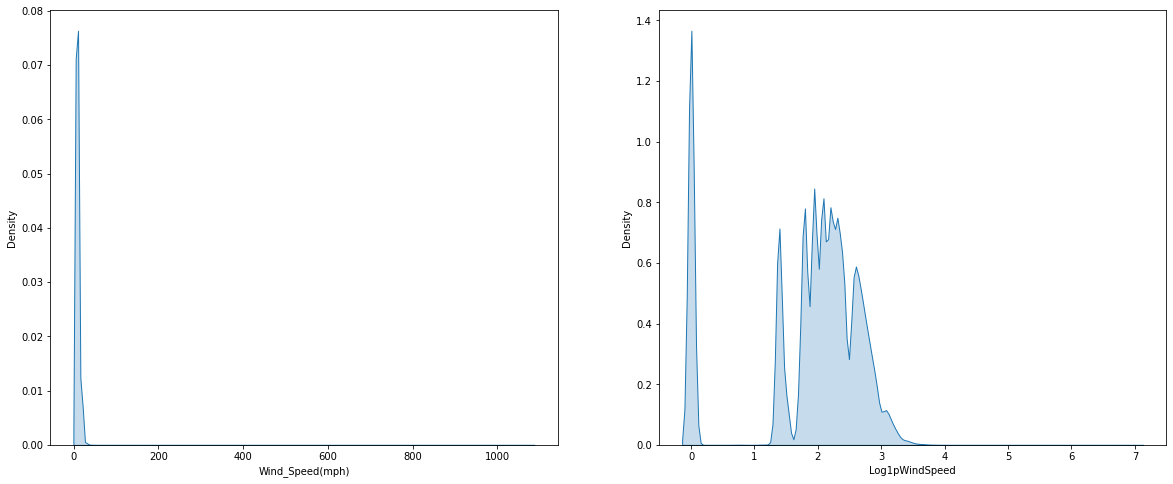

In [16]:
accidents['Log1pWindSpeed'] = accidents['Wind_Speed(mph)'].apply(np.log1p)
# accidents['LogWindSpeed'] = accidents['Wind_Speed(mph)'].apply(np.log)

# Plot a Comparison
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.kdeplot(accidents['Wind_Speed(mph)'], shade=True, ax=axs[0])
sns.kdeplot(accidents.Log1pWindSpeed, shade=True, ax=axs[1])
# sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[2]);

## Counts

Features describing the presence or absence of something often come in sets, the set of risk factors for a disease, for instance. One can aggregate such features by creating a **count**.
These features will be binary (1 for `presence`, 0 for `absence`) or boolean.

Examples:
1. In traffic accidents are several features indicating whether some roadway object was near the accident. We can create a count of the total number of roadway features nearby using the `sum` method:

In [19]:
roadway_features = ["Amenity", "Bump", "Crossing", "Give_Way",
    "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop",
    "Traffic_Calming", "Traffic_Signal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,True,False,False,False,False,False,False,False,1
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,False,False,False,False,False,False,False,True,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,False,False,True,False,False,False,False,False,False,False,1
8,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,False,False,0


2. In the **concrete** dataset there are amounts of components in a concrete formulation, and many formulations lack one or more components (when the component has a value of 0). This will count how many components are in a formulation with the `gt` pandas method:

In [21]:
concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [22]:
components = [
    'cement', 'slag', 'ash', 'water', 'superplastic',
    'coarseagg', 'fineagg'
]
concrete['components'] = concrete[components].gt(0).sum(axis=1)
concrete[components + ['components']].head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,components
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,5
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,7
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,6
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,6
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,4
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,5
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,6
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,4
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,7


## Building-Up and Breaking-Down Features

Often you'll have complex strings that can usefully be broken into simpler pieces. Some common examples:

- ID numbers: '123-45-6789'
- Phone numbers: '(999) 555-0123'
- Street addresses: '8241 Kaggle Ln., Goose City, NV'
- Internet addresses: 'http://www.kaggle.com
- Product codes: '0 36000 29145 2'
- Dates and times: 'Mon Sep 30 07:06:05 2013'

Examples:
1. The `str` accessor lets you apply string methods directly to columns:

In [25]:
customer.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [30]:
customer[['Type', 'Level']] = (
    customer['Policy']
    .str
    .split(" ", expand=True) # Expands the result into separate columns
)

customer[['Policy', 'Type', 'Level']].head(5)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1


2. One can also join simple features into a composed feature if one has reason to beliecve there was some interaction in the combination

In [31]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


There are a few other kinds of data we haven't talked about here that are especially rich in information. Fortunately, we've got you covered!
1. For dates and times, see Parsing Dates from our [Data Cleaning course](https://www.kaggle.com/code/alexisbcook/parsing-dates/tutorial).
2. For latitudes and longitudes, see our [Geospatial Analysis course](https://www.kaggle.com/learn/geospatial-analysis).
3. For text, try [Natural Language Processing](https://www.kaggle.com/code/abhishek/approaching-almost-any-nlp-problem-on-kaggle).

## Group Transforms

Aggregates information across multiple rows grouped by some category. With grouped transform one can create features like: "the average income of a person's state of residence". If one has discovered a category interaction, a group trasnform over that category could be something good to investigate. 

Example:
1. A group transform combines two features: a categorical feature that provides the grouping and another feature whose values you wish to aggregate:

In [32]:
customer.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Type', 'Level'],
      dtype='object')

In [33]:
customer['AverageIncome'] = (
    customer.groupby('State')['Income']
    .transform('mean')
)
customer[['State', 'Income', 'AverageIncome']].head(5)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083


2. The `transform` method can be used with `max`, `min`, `median`, `var`, `std`, and `count`. Here's how one could calculate the frequency with which each state occurs in the dataset:

In [34]:
customer['StateFreq'] = (
    customer.groupby('State')['State']
    .transform('count') / customer.State.count()
)
customer[['State', 'StateFreq']].head(5)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366


3. One can use a transform like this to create **frequency encoding** for a categorical feature. If you are using training and validating splits, to preserve their independence, it is best to create grouped feature using only training and propagate it into validation set: 

In [36]:
customer.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Type', 'Level', 'AverageIncome',
       'StateFreq'],
      dtype='object')

In [39]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["Total Claim Amount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)
df_valid[["Coverage", "AverageClaim"]].head(5)


,Coverage,AverageClaim
0,Basic,375.343033
1,Basic,375.343033
2,Extended,476.048170
3,Basic,375.343033
4,Premium,652.357907


## Final Tips:

It is good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:
1. **Linear Models** learn sums and differences naturally, but can't learn anything more complex;
2. **Ratios** seem to be difficult for most models to learn. **Ratio combinations** often lead some easy performance gains;
3. **Linear Models** and **Neural Nets** generally do better in **normalized features**. 
    - **Neural Nets** especially need features scaled to values not too far from 0. 
    - **Tree-based models** can sometimes benefit from **normalization**, but usually much less so.
4. **Tree-based models** can learn to approximate almost any combination of features, but when combination is especially important they can still benefit from having it explicity created, especially when data is limited;
5. **Counts** are especially helpful for **Tree-based models**, since these models don't have a natural way to aggregate information across many features at once.